### Exercise 1
Display both the T1 and T2 images, their 1 and 2D histograms and scatter plots. Tips: Use the plt.imshow(), plt.hist(), plt.hist2d() and plt.scatter() functions Add relevant title and label for each axis. One can use plt.subplots() to show more subfigures in the same figure. Remove intensities from background voxels for 1D and 2D histograms.

imshow image coordinates

The two MRI image modalities contain different types of intensity classes:

* (Orange): The White Matter (WM) is the tissue type that contain the brain network - like the cables in the internet. The WM ensure the communication flow between functional brain regions.
* (Yellow): The Grey Matter (GM) is the tissue type that contain the cell bodies at the end of the brain network and are the functional units in the brain. The functional units are like CPUs in the computer. They are processing our sensorial input and are determining a reacting to these. It could be to start running.
* (Magenta): Cerebrospinal fluid (CSF) which is the water in the brain
(Green): Background of the image


Q1: What is the intensity threshold that can separate the GM and WM classes (roughly) from the 1D histograms?


Q2: Can the GM and WM intensity classes be observed in the 2D histogram and scatter plot?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from skimage import io, color

In [2]:
in_dir = 'data/'
in_file = 'ex6_ImagData2Load.mat'
data = sio.loadmat(in_dir + in_file)
imgT1 = data['ImgT1']
imgT2 = data['ImgT2']
ROI_GM = data['ROI_GM']
ROI_WM = data['ROI_WM']

In [6]:
#map values of CT scan to grayscale values
imgT1_grey = (imgT1 - np.min(imgT1)) / (np.max(imgT1) - np.min(imgT1))


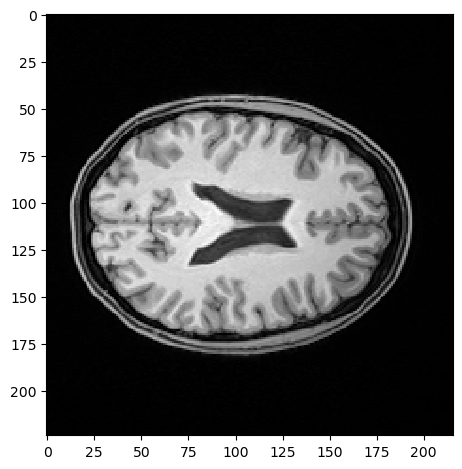

In [7]:
io.imshow(imgT1_grey)

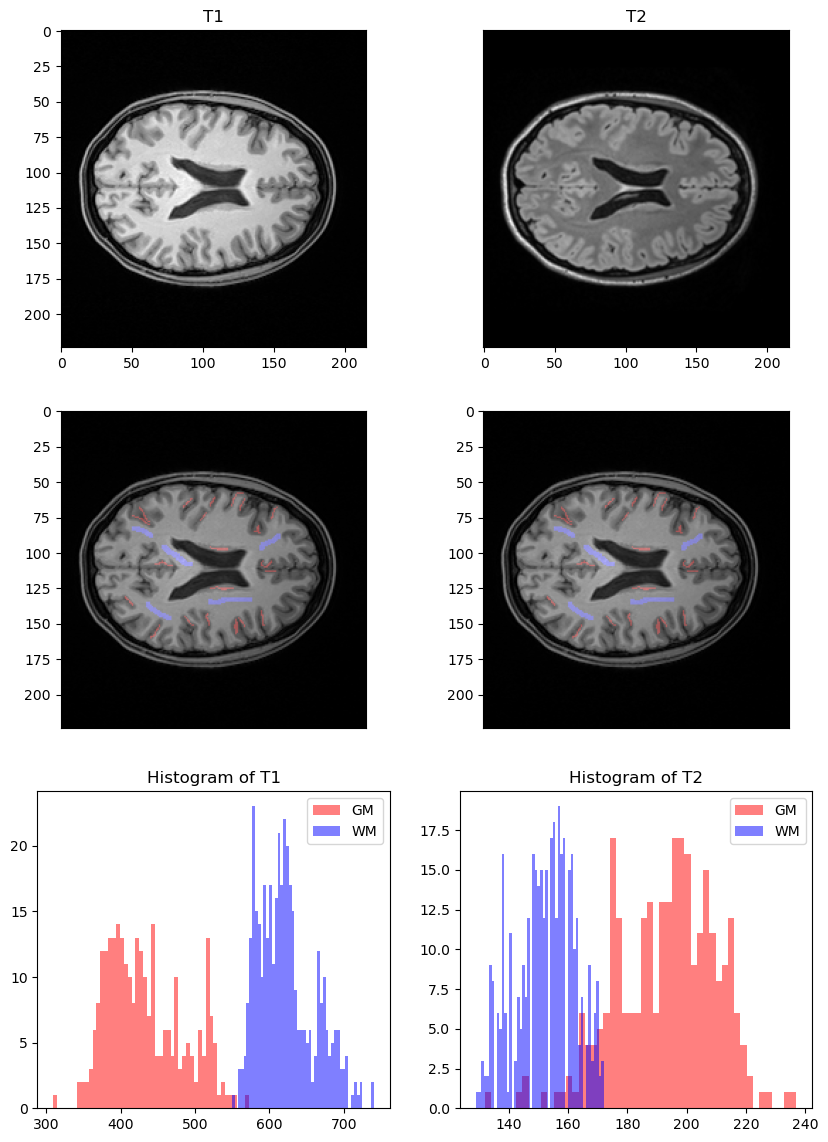

In [8]:
vmin_T1 = np.min(imgT1)
vmax_T1 = np.max(imgT1)
vmin_T2 = np.min(imgT2)
vmax_T2 = np.max(imgT2)

label_img = ROI_GM + 2 * ROI_WM
from skimage.color import label2rgb
T1_overlay = label2rgb(label_img, image=imgT1_grey, bg_label=0, colors=['red', 'blue'], kind='overlay')
T2_overlay = label2rgb(label_img, image=imgT1_grey, bg_label=0, colors=['red', 'blue'], kind='overlay')

# Plot the images
figure, axes = plt.subplots(3, 2, figsize=(10, 14))
axes[0][0].imshow(imgT1, cmap='gray')
axes[0][0].set_title('T1')

axes[0][1].imshow(imgT2, cmap='gray')
axes[0][1].get_yaxis().set_visible(False)
axes[0][1].set_title('T2')

#Plot color coded ROIs on top of T1
axes[1][0].imshow(T1_overlay)
axes[1][0].get_xaxis().set_visible(False)

#Plot color coded ROIs on top of T2
axes[1][1].imshow(T2_overlay)
axes[1][1].get_xaxis().set_visible(False)

#plot histogram of T1
axes[2][0].hist(imgT1[ROI_GM == 1], bins=50, color='r', alpha=0.5, label='GM')
axes[2][0].hist(imgT1[ROI_WM == 1], bins=50, color='b', alpha=0.5, label='WM')
axes[2][0].set_title('Histogram of T1')
axes[2][0].legend()
#Plot histogram of T2
axes[2][1].hist(imgT2[ROI_GM == 1], bins=50, color='r', alpha=0.5, label='GM')
axes[2][1].hist(imgT2[ROI_WM == 1], bins=50, color='b', alpha=0.5, label='WM')
axes[2][1].set_title('Histogram of T2')
axes[2][1].legend()
plt.show()


In [9]:
imgT1.shape
imgT1[0:10,0:10]

array([[ 3,  3,  2,  4,  4,  5,  8,  1,  1,  3],
       [ 9,  6,  2,  2,  2,  3,  3,  5,  2,  2],
       [ 8,  8,  2,  0,  1,  4,  7,  4,  1,  6],
       [ 5,  0,  3,  1,  0,  3,  5,  4,  6,  5],
       [ 3,  1,  4,  3,  0,  7, 10,  2,  3,  8],
       [ 5,  4,  2,  1,  3,  6,  2,  0,  3,  6],
       [ 6,  2, 10,  6,  1,  4,  4,  4,  3,  2],
       [ 2,  4,  2,  5,  1,  1,  3,  1,  2,  1],
       [ 4,  4,  0,  2,  3,  2,  3,  3,  3,  1],
       [ 4,  5,  5,  8,  8,  3,  2,  5,  5,  0]], dtype=uint16)

Text(0.5, 1.0, 'Histogram of T2')

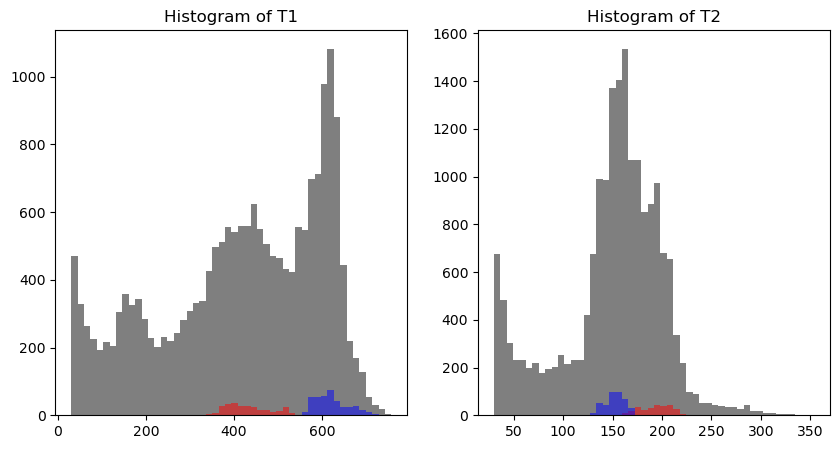

In [10]:
#Plot two subplots, one with a histogram of T1 and one of T2 with all values in the range of 30 to max

figure, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(imgT1.ravel(), bins=50, range=(30, np.max(imgT1)), color='k', alpha=0.5);
axes[0].hist(imgT1[ROI_GM == 1], bins=50, range=(30, np.max(imgT1)), color='r', alpha=0.5, label='GM');
axes[0].hist(imgT1[ROI_WM == 1], bins=50, range=(30, np.max(imgT1)), color='b', alpha=0.5, label='WM');
axes[0].set_title('Histogram of T1')
axes[1].hist(imgT2.ravel(), bins=50, range=(30, np.max(imgT2)), color='k', alpha=0.5);
axes[1].hist(imgT2[ROI_GM == 1], bins=50, range=(30, np.max(imgT2)), color='r', alpha=0.5, label='GM');
axes[1].hist(imgT2[ROI_WM == 1], bins=50, range=(30, np.max(imgT2)), color='b', alpha=0.5, label='WM');
axes[1].set_title('Histogram of T2')


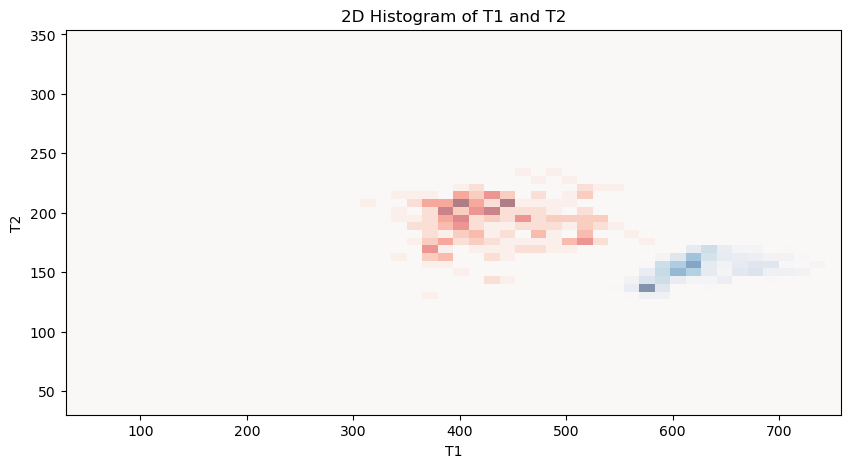

In [11]:
#Plot a 2D histogram of the GM and WM regions of T1 and T2 and color code the regions
figure, axes = plt.subplots(1, 1, figsize=(10, 5))
GM_hist = plt.hist2d(imgT1[ROI_GM == 1], imgT2[ROI_GM == 1], bins=50, cmap='Reds', range=[[30, np.max(imgT1)], [30, np.max(imgT2)]], alpha=1, label='GM')
WM_hist = plt.hist2d(imgT1[ROI_WM == 1], imgT2[ROI_WM == 1], bins=50, cmap='Blues', range=[[30, np.max(imgT1)], [30, np.max(imgT2)]], alpha=0.5, label='WM')
plt.title('2D Histogram of T1 and T2')
plt.xlabel('T1')
plt.ylabel('T2')
plt.show()

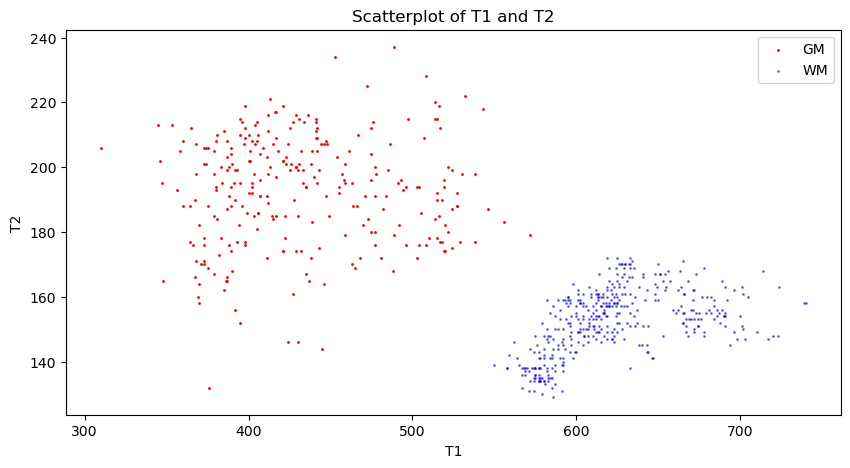

In [12]:
#Plot a scatterplot of the GM and WM regions of T1 and T2 and color code the regions
figure, axes = plt.subplots(1, 1, figsize=(10, 5))
plt.scatter(imgT1[ROI_GM == 1], imgT2[ROI_GM == 1], s=1, c='r', alpha=1, label='GM')
plt.scatter(imgT1[ROI_WM == 1], imgT2[ROI_WM == 1], s=1, c='b', alpha=0.5, label='WM')
#plot the labels
plt.legend()
plt.title('Scatterplot of T1 and T2')
plt.xlabel('T1')
plt.ylabel('T2')
plt.show()

* Q1: Intensity threshold from the 1D histograms seem to be prox 560 for T1 and 165 for T2.
* Q2: Yes, the GM and WM intensity classes can be observed in the 2D histogram and scatter plot.

## LDA

In [13]:
#Make a vector of the pixel values that match the ROI mask, and zip the GM and WM vectors together
GM_T1 = imgT1[ROI_GM == 1]
GM_T2 = imgT2[ROI_GM == 1]
X_GM = np.array(list(zip(GM_T1, GM_T2)))
y_GM = np.zeros(len(X_GM))

WM_T1 = imgT1[ROI_WM == 1]
WM_T2 = imgT2[ROI_WM == 1]
X_WM = np.array(list(zip(WM_T1, WM_T2)))
y_WM = np.ones(len(X_WM))

#Combine the GM and WM vectors into one
X = np.concatenate((X_GM, X_WM))
y = np.concatenate((y_GM, y_WM))

In [14]:
#import the function LDA from the local python file LDA.py located in /data/
from data.LDA import LDA
W = LDA(X, y)


In [44]:
Xall= np.c_[imgT1.ravel(), imgT2.ravel()]
Y = np.c_[np.ones((len(Xall), 1)), Xall] @ W.T

In [15]:
W

array([[-131.32787698,    0.15900268,    0.99568003],
       [-138.11536977,    0.27566672,    0.68044071]])

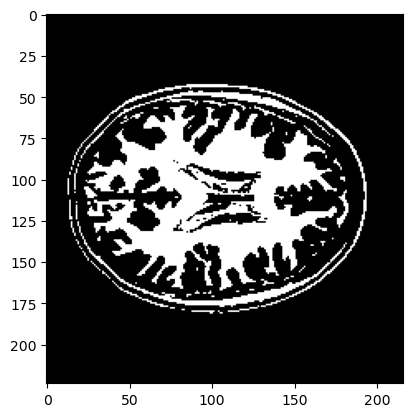

In [62]:
#Using argmax to find the maximum value in the array and reshape it to the original image size
#This is the classification map
Y_class = np.argmax(Y, axis=1).reshape(imgT1.shape)
#Plot the classification map, if 0 = GM and 1 = WM
plt.imshow(Y_class, cmap='gray')

Looks correct although also classifying all pixels outside trained areas as either or.

In [73]:
#Calculating the accuracy of the classification for each class by comparing the actual mask to the classification map
#GM
GM_accuracy = np.sum(Y_class[ROI_GM == 1] == 0) / np.sum(ROI_GM == 1)
print('GM accuracy: ', GM_accuracy)
#WM
WM_accuracy = np.sum(Y_class[ROI_WM == 1] == 1) / np.sum(ROI_WM == 1)
print('WM accuracy: ', WM_accuracy)

GM accuracy:  0.9892857142857143
WM accuracy:  1.0


In [114]:
#Plot the decision boundary on the above scatterplot
#The decision boundary is the line where the substracting the scores of the two classes is equal to zero
#Make a function of x by inserting dummy values to calculate the y values
W_T1 = W[0,0:,] 
W_T2 = W[1,0:,]

print(W_T1)
print(W_T2)



[-131.32787698    0.15900268    0.99568003]
[-138.11536977    0.27566672    0.68044071]


C:\Users\soilsense\AppData\Local\Temp\ipykernel_4184\3583742532.py:29: UserWarning: No contour levels were found within the data range.
  plt.contour(xx, yy, decision_boundary, levels=[0], colors='k', linestyles='--')


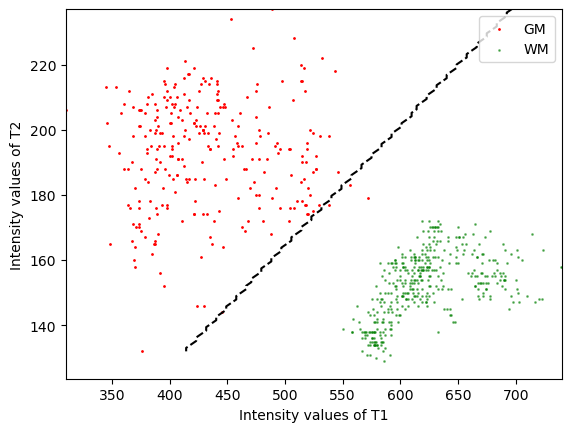

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

# Create a meshgrid of x and y values
x_min, x_max = imgT1[ROI_GM == 1].min(), imgT1[ROI_WM == 1].max()
y_min, y_max = imgT2[ROI_GM == 1].min(), imgT2[ROI_GM == 1].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Concatenate the x and y values from the meshgrid
mesh_points = np.c_[xx.ravel(), yy.ravel()]

# Add a column of ones to the mesh_points for the bias term
mesh_points_with_bias = np.hstack((np.ones((mesh_points.shape[0], 1)), mesh_points))

# Calculate the LDA scores for each point in the meshgrid
scores = np.dot(W, mesh_points_with_bias.T)

# Calculate the decision boundary by thresholding the scores at 0
decision_boundary = (scores[1] - scores[0]) >= 0
decision_boundary = decision_boundary.reshape(xx.shape)

# Plot the decision boundary
plt.contour(xx, yy, decision_boundary, levels=[0], colors='k', linestyles='--')

# Plot the scatter plot of imgT1 and imgT2
#plt.scatter(imgT1.ravel(), imgT2.ravel(), c='blue', marker='.', alpha=0.5)
plt.scatter(imgT1[ROI_GM == 1], imgT2[ROI_GM == 1], s=1, c='r', alpha=1, label='GM')
plt.scatter(imgT1[ROI_WM == 1], imgT2[ROI_WM == 1], s=1, c='g', alpha=0.5, label='WM')

# Set the axis labels
plt.xlabel('Intensity values of T1')
plt.ylabel('Intensity values of T2')
plt.legend()
plt.show()


### Exercise 9
PosteriorProb

In [115]:
PosteriorProb = np.clip((np.exp(Y) / np.sum(np.exp(Y),1)[:, np.newaxis]), 0, 1)

In [116]:
PosteriorProb[0]

array([0.99840216, 0.00159784])

In [121]:
PosteriorProb[:,0]

array([0.99840216, 0.99840216, 0.99857785, ..., 0.99840216, 0.99840216,
       0.99887348])

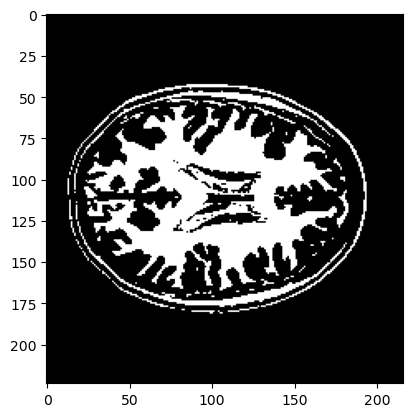

In [122]:
#Pixels with a posterior probability of being WM > 0.5 are classified as WM
#Plot the classification
img_GM_LDA = np.where(PosteriorProb[:,0] > 0.5, 0, 1).reshape(imgT1.shape)
plt.imshow(img_GM_LDA, cmap='gray')
plt.show()

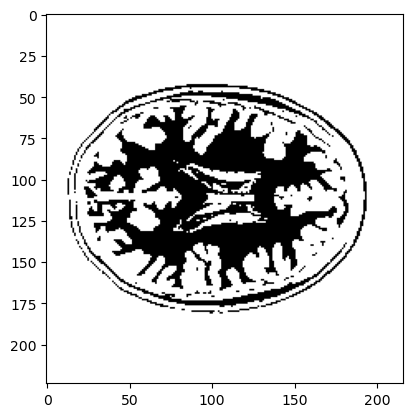

In [124]:
#Create a mask of the GM regions where the posterior probability of being GM > 0.5
img_GM_LDA = np.where(PosteriorProb[:,1] > 0.5, 0, 1).reshape(imgT1.shape)
#Apply the ROI_GM mask so that only values that are true both in the ROI_GM and img_GM_LDA are kept
#img_GM_LDA = img_GM_LDA * ROI_GM
#Plot the classification
plt.imshow(img_GM_LDA, cmap='gray')

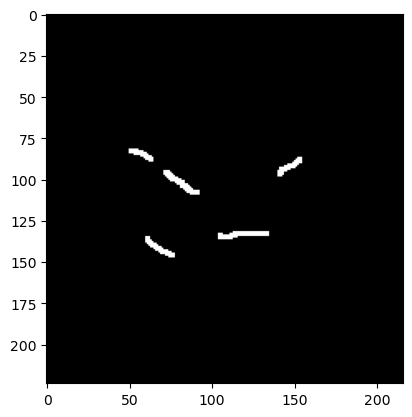

In [141]:
#Plot the classification of WM
img_WM_LDA = np.where(PosteriorProb[:,0] > 0.5, 0, 1).reshape(imgT1.shape)
img_WM_LDA = img_WM_LDA * ROI_WM
plt.imshow(img_WM_LDA, cmap='gray')
plt.show()

In [125]:
#Calculate the error rate of the LDA classifier
error_rate = np.sum(np.abs(img_GM_LDA - ROI_GM)) / np.sum(ROI_GM)
print('Error rate of LDA classifier on GM: ', error_rate, ' %')

#Calculate the error rate of the LDA classifier
error_rate = np.sum(np.abs(img_WM_LDA - ROI_WM)) / np.sum(ROI_WM)
print('Error rate of LDA classifier WM: ', error_rate, ' %')


Error rate of LDA classifier on GM:  138.24285714285713  %


NameError: name 'img_WM_LDA' is not defined